In [4]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import cv2
import rasterio
import matplotlib.pyplot as plt
from IPython.display import display
from albumentations import Compose, CropNonEmptyMaskIfExists

In [5]:
train_csv_path = '/datasets/rpartsey/satellite/planet/smart_crop/with_mask/files.csv'

In [6]:
df = pd.read_csv(train_csv_path)

In [7]:
df.head()

image_path  \
0  /datasets/rpartsey/satellite/planet/smart_crop...   
1  /datasets/rpartsey/satellite/planet/smart_crop...   
2  /datasets/rpartsey/satellite/planet/smart_crop...   
3  /datasets/rpartsey/satellite/planet/smart_crop...   
4  /datasets/rpartsey/satellite/planet/smart_crop...   

                                           mask_path  
0  /datasets/rpartsey/satellite/planet/smart_crop...  
1  /datasets/rpartsey/satellite/planet/smart_crop...  
2  /datasets/rpartsey/satellite/planet/smart_crop...  
3  /datasets/rpartsey/satellite/planet/smart_crop...  
4  /datasets/rpartsey/satellite/planet/smart_crop...

In [5]:
df.iloc[0,0]

'/datasets/rpartsey/satellite/planet/smart_crop/with_mask/images/spring-20170311_075415_0e0f-0.tif'

In [13]:
def read_tif(path, *args, **kwargs):
    """
    Args:
        path (string): Path to the tif file.

    Returns:
        numpy.ndarray: Numpy array of shape (CxHxW)
    """
    with rasterio.open(path) as source:
        bands = source.read()
        return bands
    
    
def visualize(*images, **configs):
    figsize = configs.get('figsize') or (5, 5)
    titles = configs.get('titles') or [None] * len(images)
    plot_params = configs['plot_params']
    
    fig, axes = plt.subplots(1, len(images), figsize=figsize)

    for ax, image, title, params in zip(axes, images, titles, plot_params):
        ax.axis('off')
        ax.set_title(title)
        ax.imshow(image, **params)
    
    plt.show()

In [ ]:
# for index, row in df[-40:].iterrows():
#     image_path, mask_path = row
#     label = 1
    
#     tif_image = read_tif(image_path)  # uint16
#     tif_mask = read_tif(mask_path)  # uint8
    
#     b, g, r, nir = tif_image
#     mask = tif_mask[0]
    
#     rgb = np.array([r, g, b]).transpose((1, 2, 0))
#     rgb = cv2.normalize(rgb, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    
#     nir = cv2.normalize(nir, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    
#     print('Burned area' if label else 'no burned area')
#     visualize(
#         *[np.clip(image, 0, 1) for image in [rgb, mask, nir]],
#         titles=['rgb', 'mask', 'nir'],
#         plot_params=[{}, {}, {'cmap': 'gray'}],
#         figsize=(15, 5)
#     ) 

In [18]:
# crop = Compose([CropNonEmptyMaskIfExists(height=256, width=256, p=1.0)], p=1.0)

# for index, row in df[350:400].iterrows():
#     image_path, mask_path = row
#     label = 1
    
#     tif_image = read_tif(image_path)  # uint16
#     tif_mask = read_tif(mask_path)  # uint8
    
#     b, g, r, nir = tif_image
#     mask = tif_mask[0]
    
#     rgb = np.array([r, g, b]).transpose((1, 2, 0))
#     rgb = cv2.normalize(rgb, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    
#     nir = cv2.normalize(nir, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    
#     print(os.path.basename(image_path))
#     print('Burned area' if label else 'no burned area')
#     print('Original')
#     visualize(
#         *[np.clip(image, 0, 1) for image in [rgb, mask, nir]],
#         titles=['rgb', 'mask', 'nir'],
#         plot_params=[{}, {}, {'cmap': 'gray'}],
#         figsize=(18, 6)
#     ) 
    
#     cropped = crop(image=tif_image.transpose((1,2,0)), mask=tif_mask.transpose((1,2,0)))
    
#     tif_image = cropped['image'].transpose((2,0,1))
#     tif_mask = cropped['mask'].transpose((2,0,1))
    
    
#     b, g, r, nir = tif_image
#     mask = tif_mask[0]
    
#     rgb = np.array([r, g, b]).transpose((1, 2, 0))
#     rgb = cv2.normalize(rgb, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    
#     nir = cv2.normalize(nir, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    
#     print('Cropped')
#     visualize(
#         *[np.clip(image, 0, 1) for image in [rgb, mask, nir]],
#         titles=['rgb', 'mask', 'nir'],
#         plot_params=[{}, {}, {'cmap': 'gray'}],
#         figsize=(18, 6)
#     ) 

In [57]:
df_with_labels = df[df.label.astype(bool)].reset_index(drop=True)

In [58]:
areas = []
indices = []

for index, row in df_with_labels.iterrows():
    image_path, mask_path, label = row
    
#     tif_image = read_tif(image_path)  # uint16
    tif_mask = read_tif(mask_path)  # uint8
    
#     b, g, r, nir = tif_image
    mask = tif_mask[0]
    num_masked_pixels = mask.sum()
    if num_masked_pixels <= 256:
        areas.append(num_masked_pixels)
        indices.append(index)

In [59]:
len(areas)

99

(array([22., 14., 18., 12., 10.,  7.,  9.,  7.]),
 array([  1.  ,  32.25,  63.5 ,  94.75, 126.  , 157.25, 188.5 , 219.75,
        251.  ]),
 <a list of 8 Patch objects>)

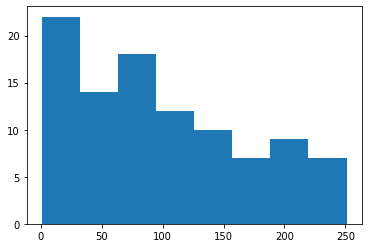

In [60]:
plt.hist(areas, bins='auto')

In [61]:
indices = np.array(indices)

In [62]:
df_small = df_with_labels.iloc[indices, :]

In [63]:
df_small.shape

(99, 3)

In [48]:
# for index, row in df_small.iterrows():
#     image_path, mask_path, label = row
    
#     tif_image = read_tif(image_path)  # uint16
#     tif_mask = read_tif(mask_path)  # uint8
    
#     b, g, r, nir = tif_image
#     mask = tif_mask[0]
    
#     rgb = np.array([r, g, b]).transpose((1, 2, 0))
#     rgb = cv2.normalize(rgb, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    
#     nir = cv2.normalize(nir, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    
#     print('Burned area' if label else 'no burned area')
#     visualize(
#         *[np.clip(image, 0, 1) for image in [rgb, mask, nir]],
#         titles=['rgb', 'mask', 'nir'],
#         plot_params=[{}, {}, {'cmap': 'gray'}],
#         figsize=(15, 5)
#     ) 

## Check previously invalid images

In [1]:
invalid_image_names = [
    'spring-20170328_074654_0f1d-2.tif',
    'spring-20170329_074623_1024-4.tif',
    'spring-20170329_074624_1024-10.tif',
    'spring-20170329_074624_1024-7.tif',
    'spring-20170329_074624_1024-9.tif',
    'spring-20170329_074626_1024-3.tif',
    'spring-20170402_074845_0f17-1.tif',
    'spring-20170402_074846_0f17-0.tif',
    'spring-20170402_074846_0f17-4.tif',
    'spring-20170403_075404_0e16-12.tif',
    'spring-20170403_075404_0e16-2.tif',
    'spring-20170411_075456_0e30-22.tif',
    'spring-20170411_075456_0e30-7.tif',
    'spring-20170429_085723_1_0c54-0.tif'
]

In [9]:
invalid_mask = df['image_path'].map(lambda path: os.path.basename(path) in invalid_image_names)

In [10]:
invalid_df = df[invalid_mask]

In [11]:
invalid_df.shape

(14, 2)

Burned area


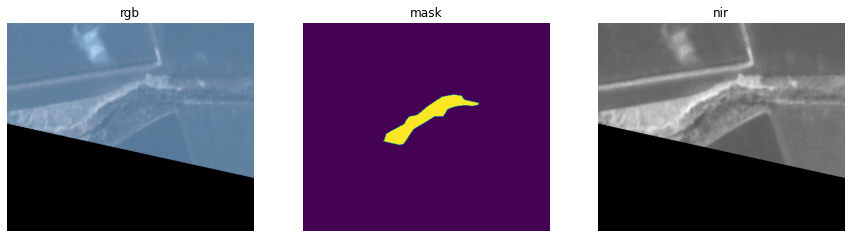

Burned area


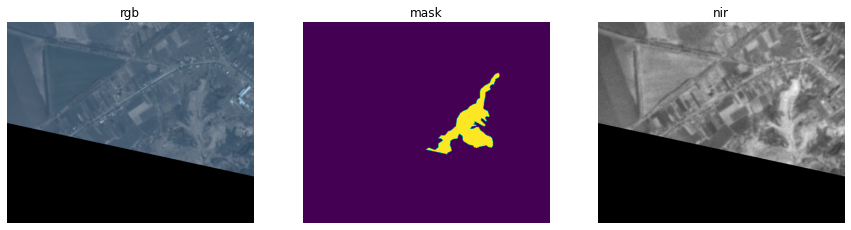

Burned area


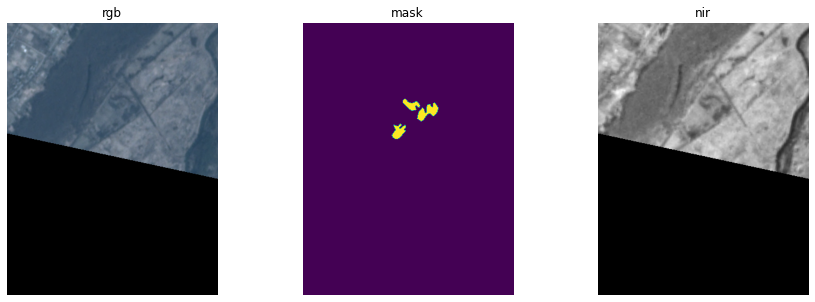

Burned area


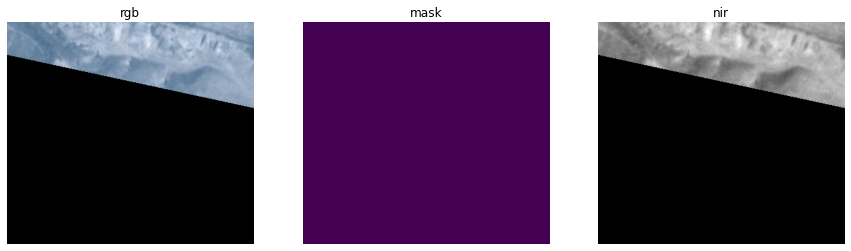

Burned area


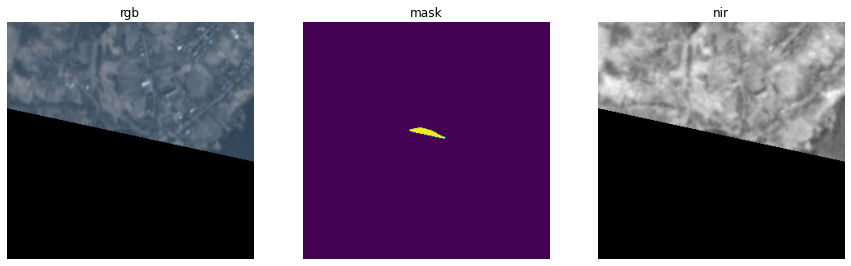

Burned area


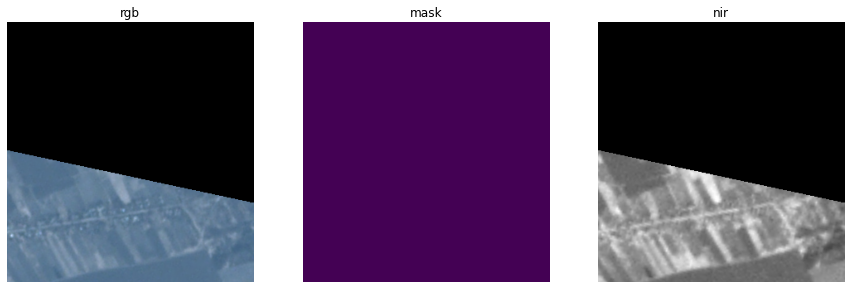

Burned area


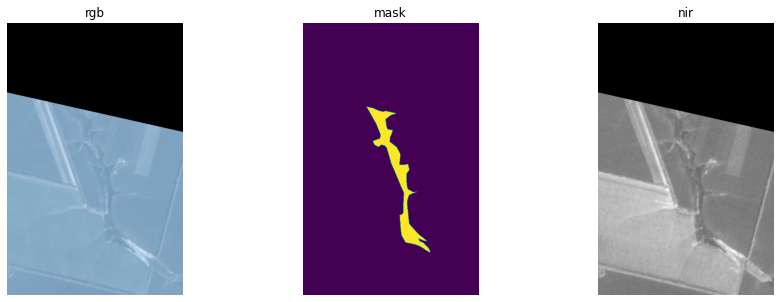

Burned area


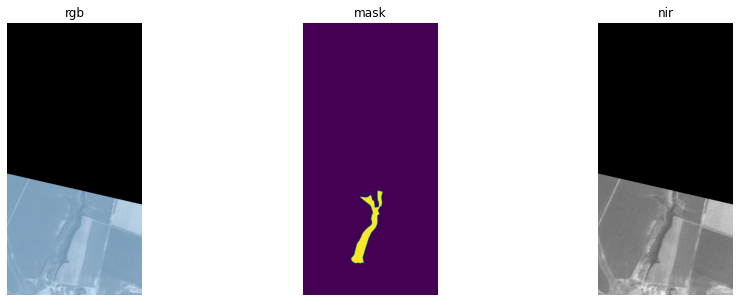

Burned area


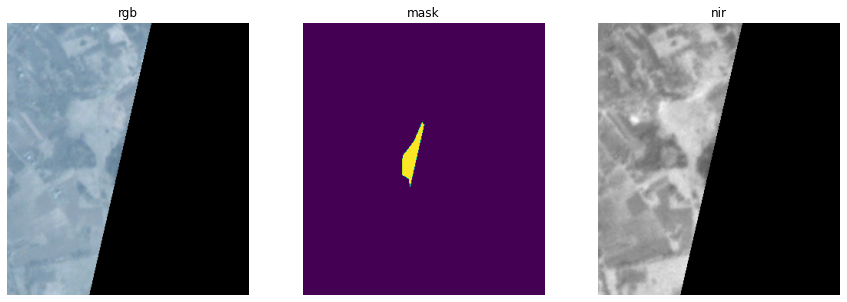

Burned area


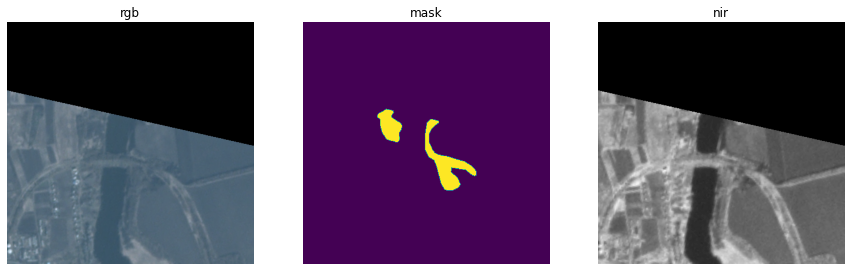

Burned area


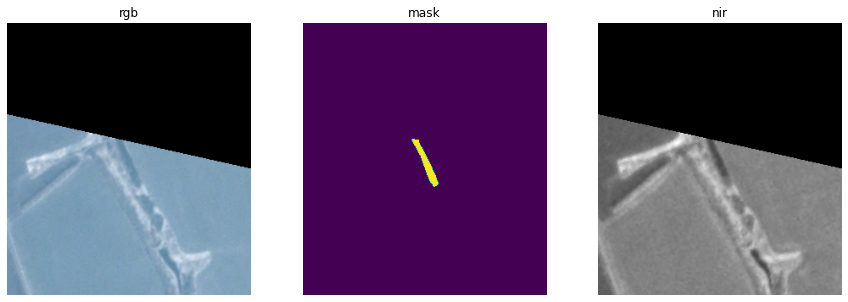

Burned area


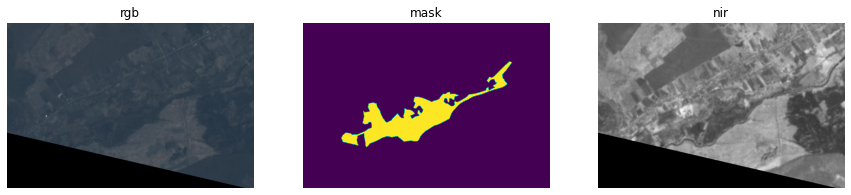

Burned area


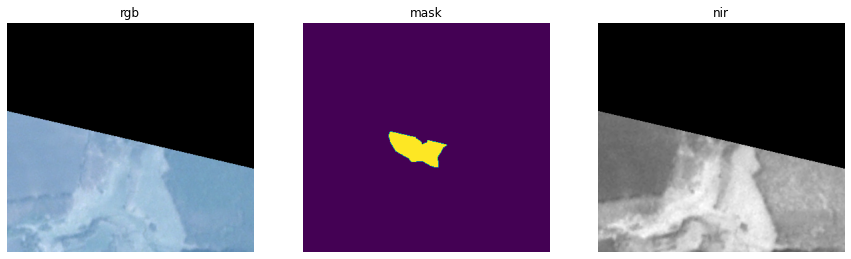

Burned area


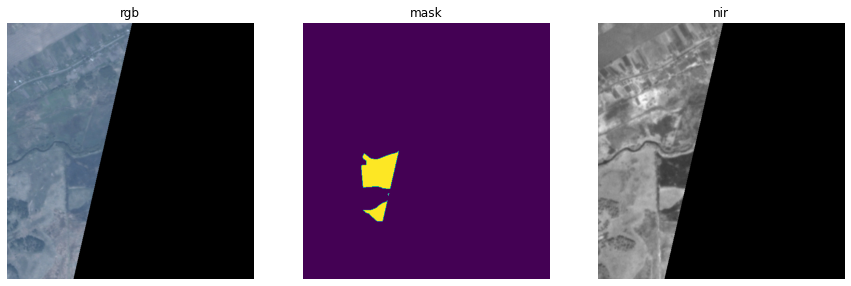

In [14]:
for index, row in invalid_df.iterrows():
    image_path, mask_path = row
    label = 1
    
    tif_image = read_tif(image_path)  # uint16
    tif_mask = read_tif(mask_path)  # uint8
    
    b, g, r, nir = tif_image
    mask = tif_mask[0]
    
    rgb = np.array([r, g, b]).transpose((1, 2, 0))
    rgb = cv2.normalize(rgb, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    
    nir = cv2.normalize(nir, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    
    print('Burned area' if label else 'no burned area')
    visualize(
        *[np.clip(image, 0, 1) for image in [rgb, mask, nir]],
        titles=['rgb', 'mask', 'nir'],
        plot_params=[{}, {}, {'cmap': 'gray'}],
        figsize=(15, 5)
    ) 

spring-20170328_074654_0f1d-2.tif
Burned area
Original


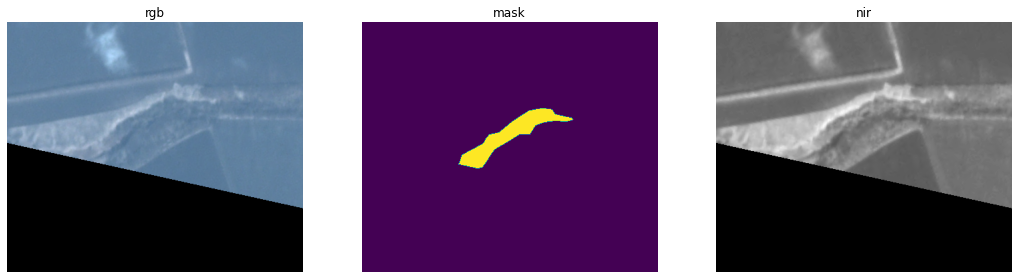

Cropped


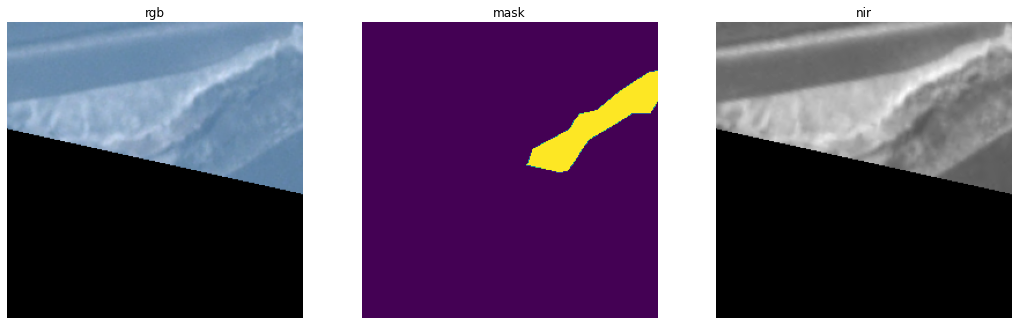

spring-20170329_074623_1024-4.tif
Burned area
Original


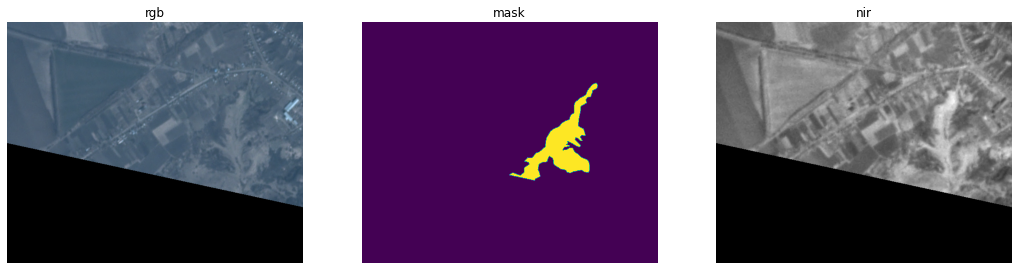

Cropped


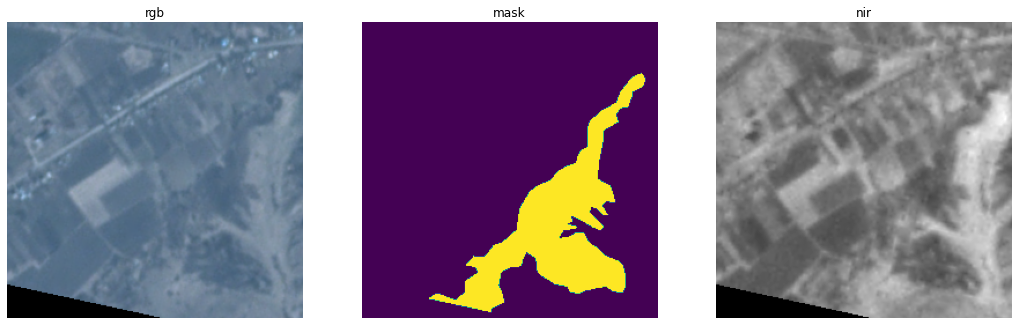

spring-20170329_074624_1024-10.tif
Burned area
Original


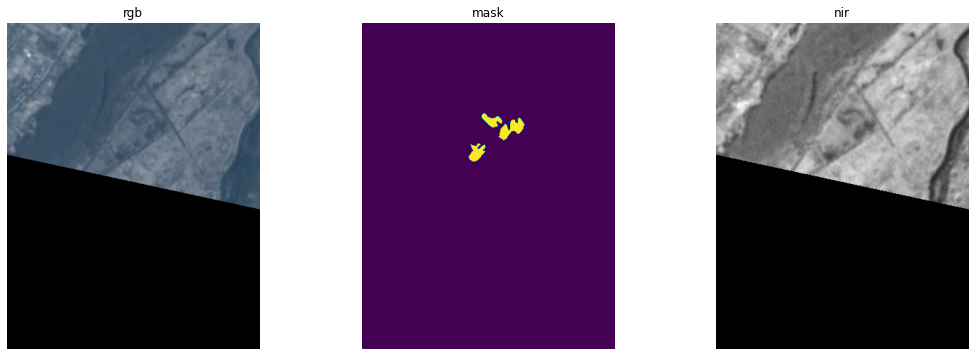

Cropped


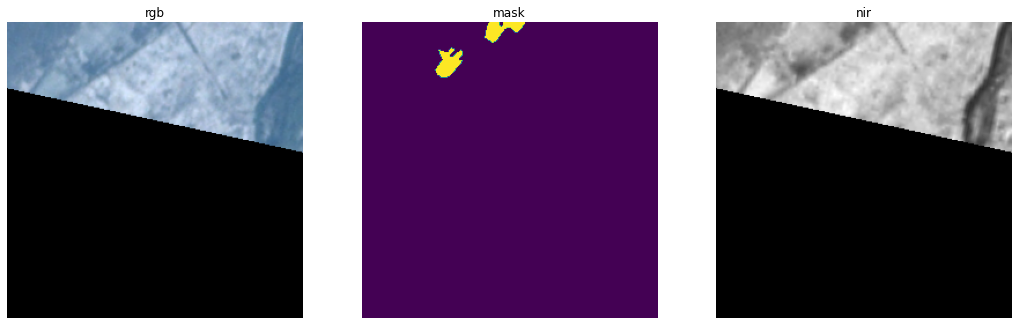

spring-20170329_074624_1024-7.tif
Burned area
Original


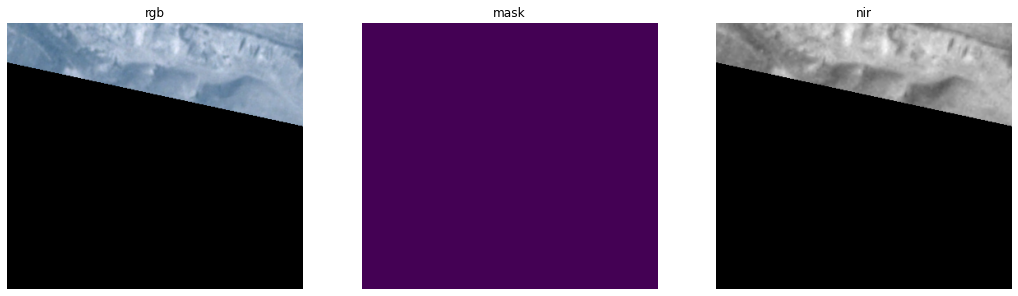

Cropped


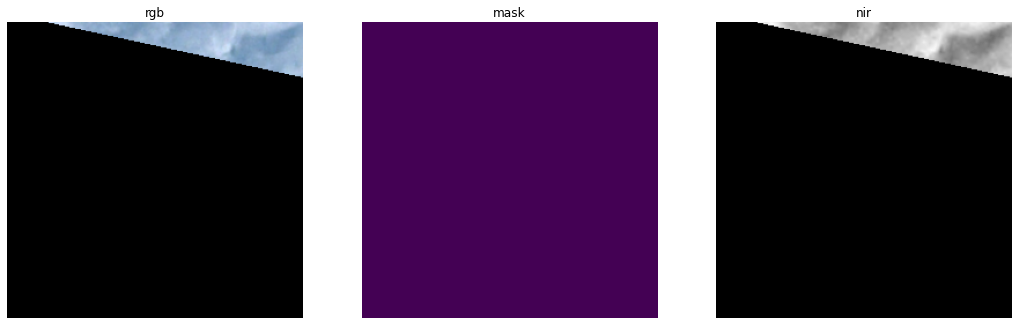

spring-20170329_074624_1024-9.tif
Burned area
Original


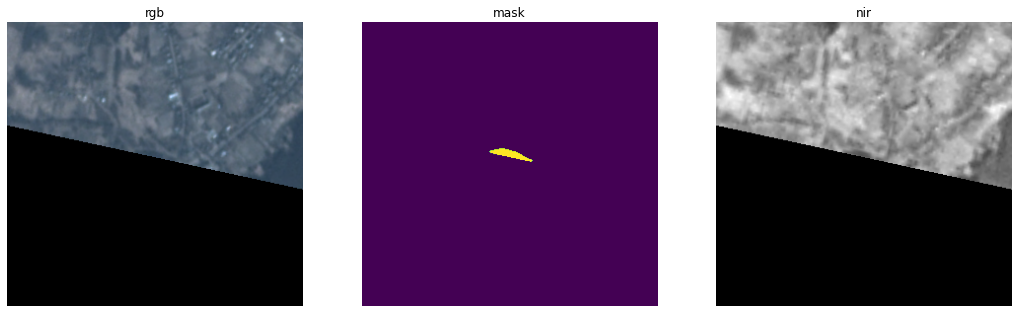

Cropped


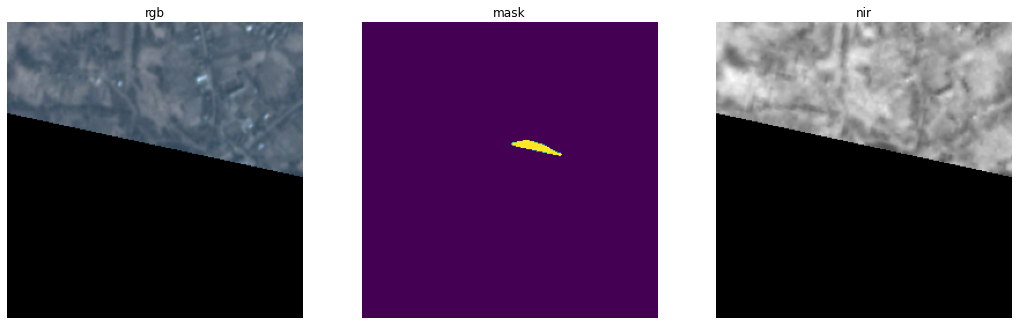

spring-20170329_074626_1024-3.tif
Burned area
Original


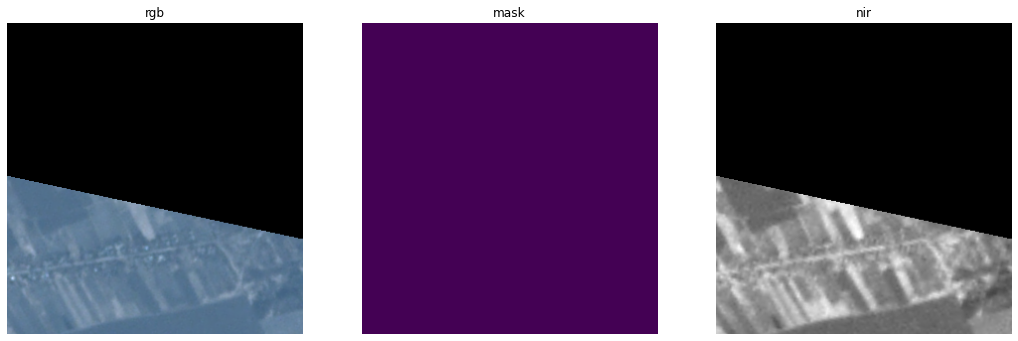

Cropped


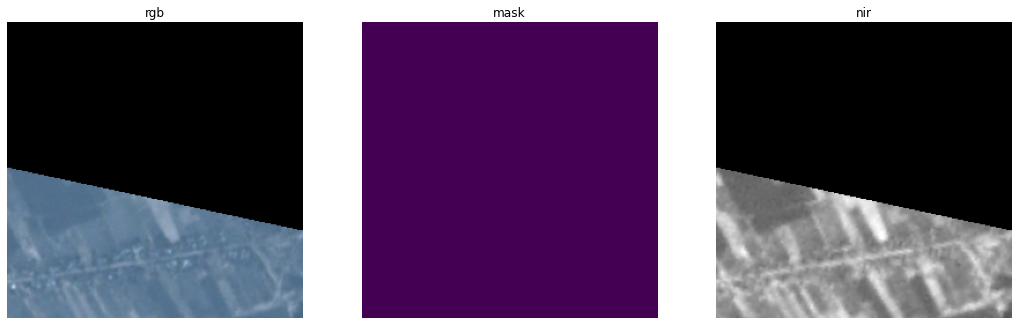

spring-20170402_074845_0f17-1.tif
Burned area
Original


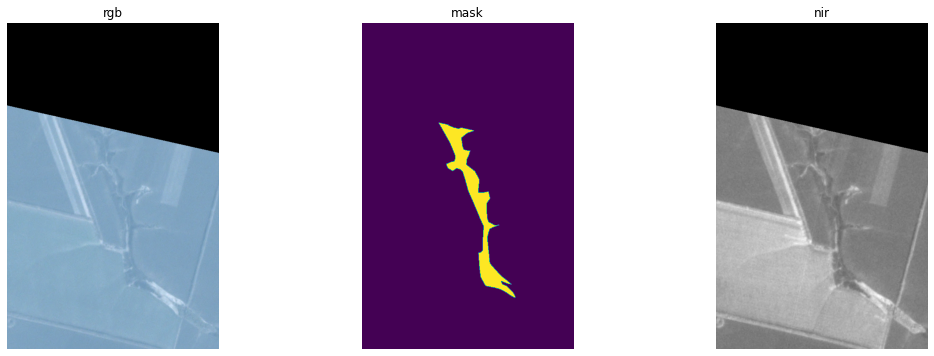

Cropped


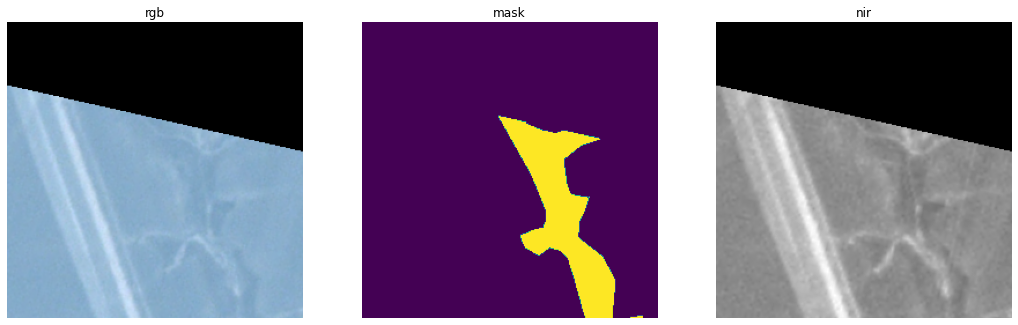

spring-20170402_074846_0f17-0.tif
Burned area
Original


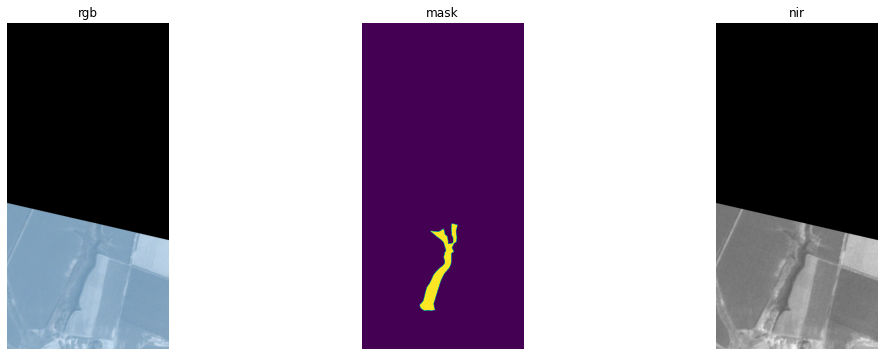

Cropped


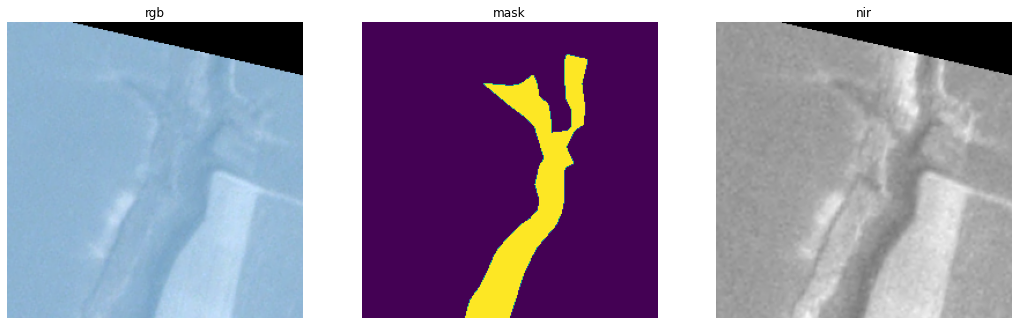

spring-20170402_074846_0f17-4.tif
Burned area
Original


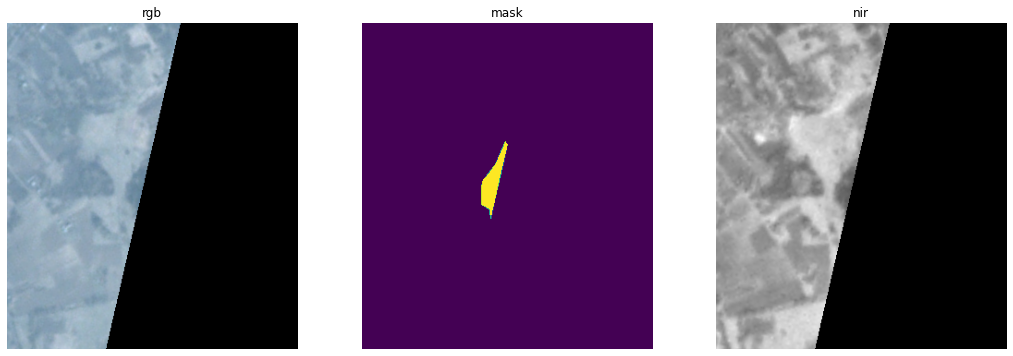

Cropped


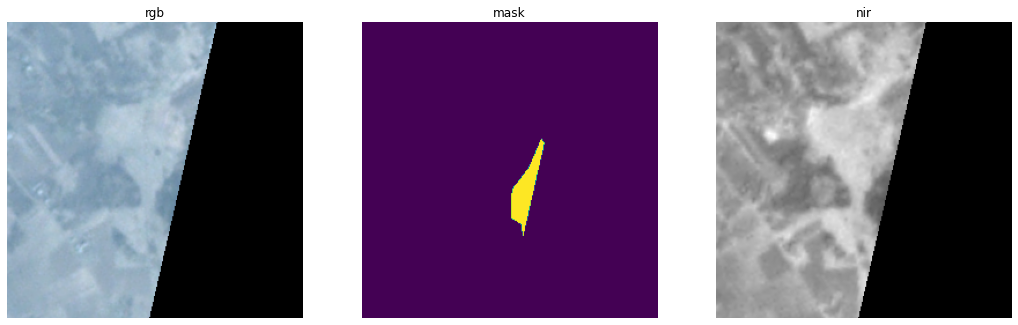

spring-20170403_075404_0e16-12.tif
Burned area
Original


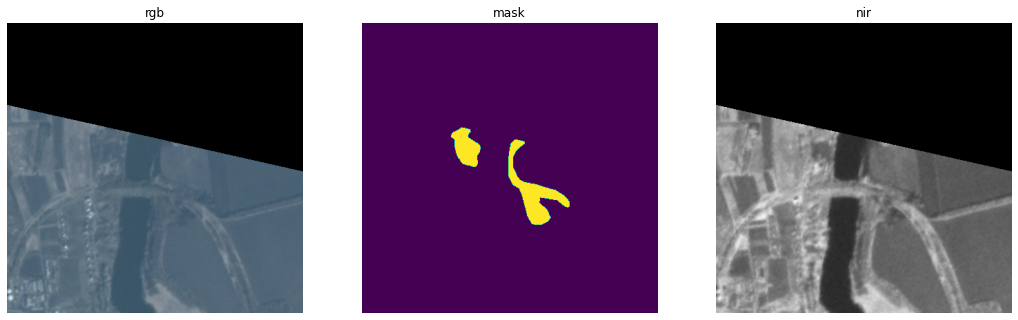

Cropped


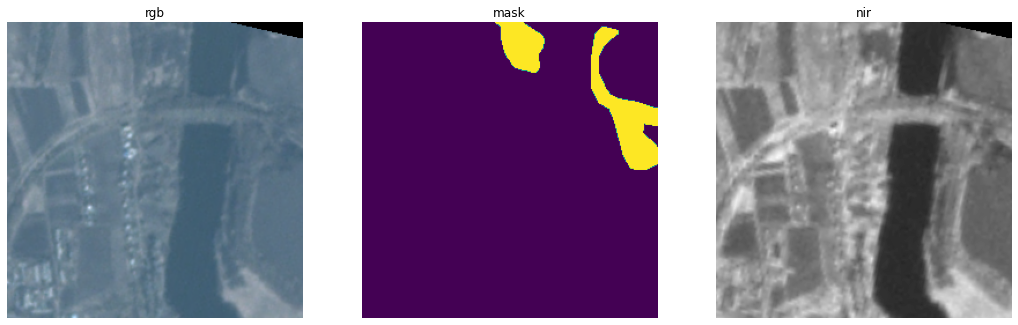

spring-20170403_075404_0e16-2.tif
Burned area
Original


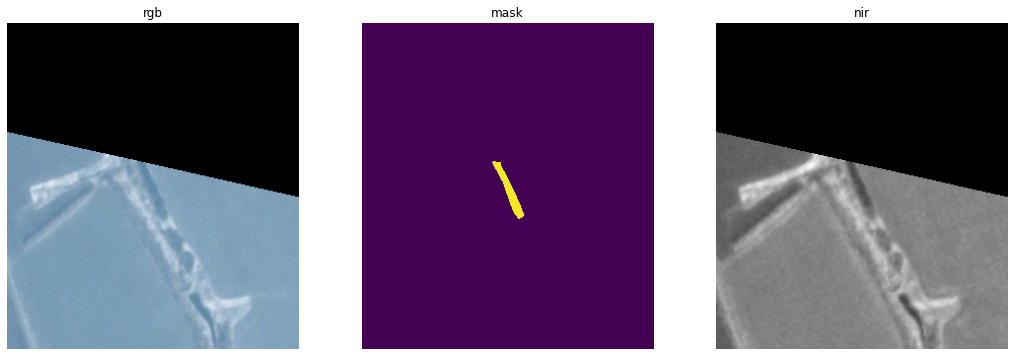

Cropped


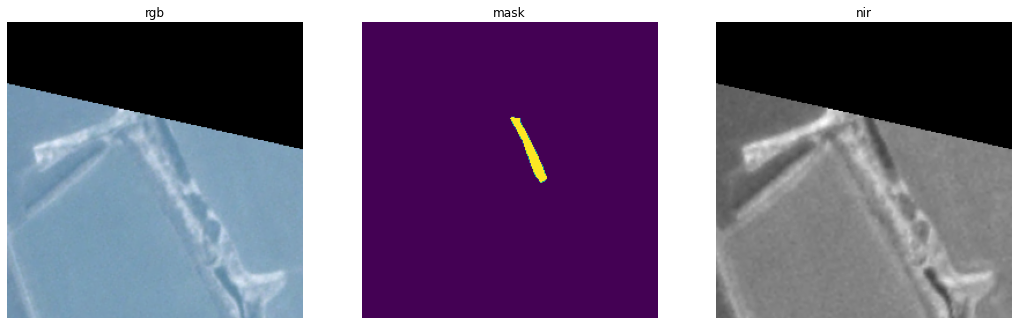

spring-20170411_075456_0e30-22.tif
Burned area
Original


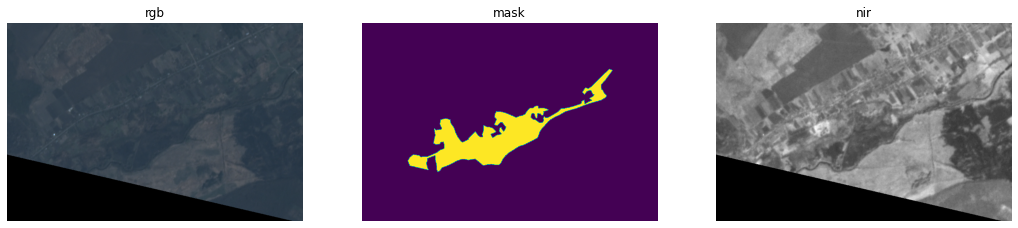

Cropped


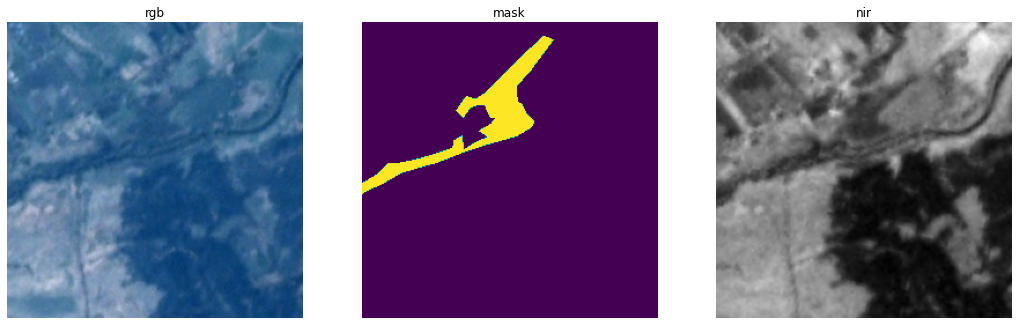

spring-20170411_075456_0e30-7.tif
Burned area
Original


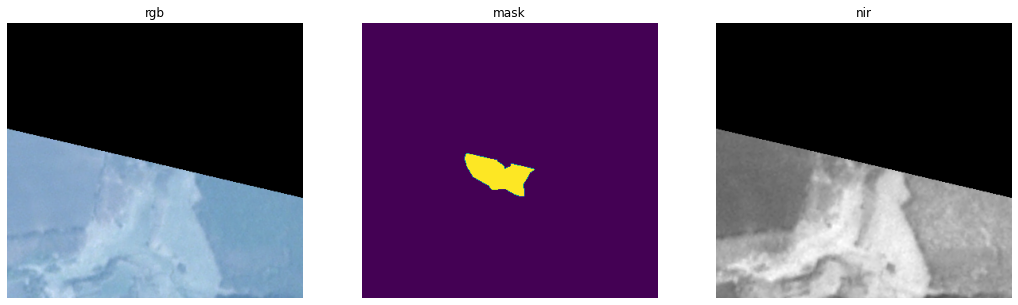

Cropped


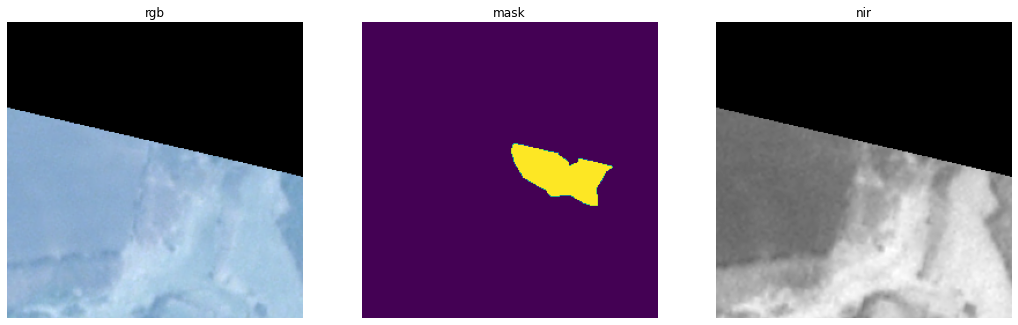

spring-20170429_085723_1_0c54-0.tif
Burned area
Original


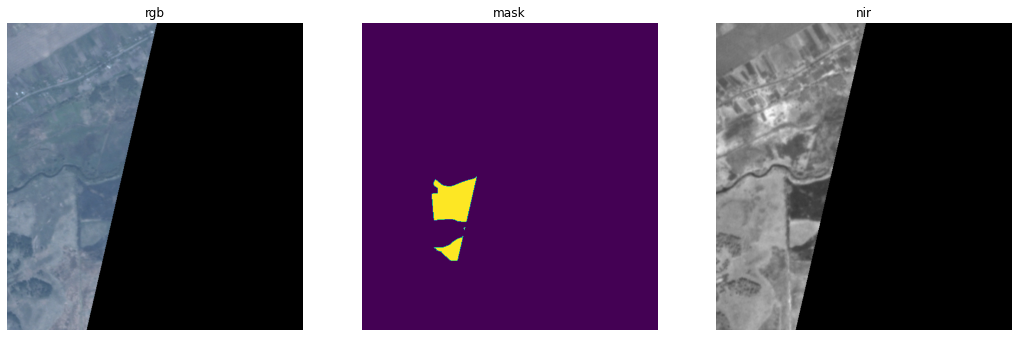

Cropped


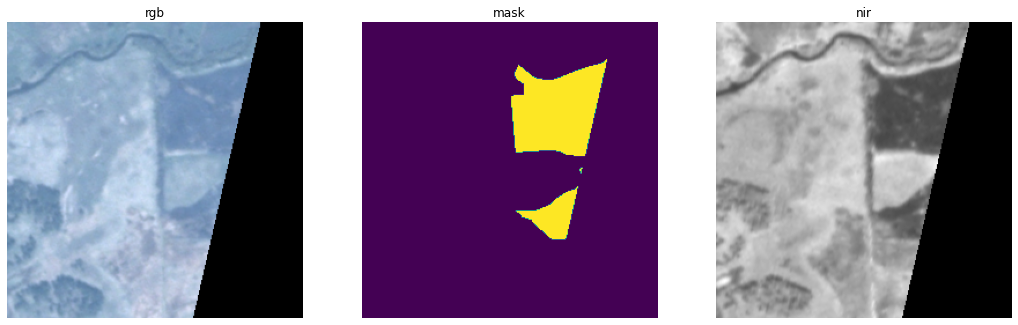

In [15]:
crop = Compose([CropNonEmptyMaskIfExists(height=256, width=256, p=1.0)], p=1.0)

for index, row in invalid_df.iterrows():
    image_path, mask_path = row
    label = 1
    
    tif_image = read_tif(image_path)  # uint16
    tif_mask = read_tif(mask_path)  # uint8
    
    b, g, r, nir = tif_image
    mask = tif_mask[0]
    
    rgb = np.array([r, g, b]).transpose((1, 2, 0))
    rgb = cv2.normalize(rgb, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    
    nir = cv2.normalize(nir, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    
    print(os.path.basename(image_path))
    print('Burned area' if label else 'no burned area')
    print('Original')
    visualize(
        *[np.clip(image, 0, 1) for image in [rgb, mask, nir]],
        titles=['rgb', 'mask', 'nir'],
        plot_params=[{}, {}, {'cmap': 'gray'}],
        figsize=(18, 6)
    ) 
    
    cropped = crop(image=tif_image.transpose((1,2,0)), mask=tif_mask.transpose((1,2,0)))
    
    tif_image = cropped['image'].transpose((2,0,1))
    tif_mask = cropped['mask'].transpose((2,0,1))
    
    
    b, g, r, nir = tif_image
    mask = tif_mask[0]
    
    rgb = np.array([r, g, b]).transpose((1, 2, 0))
    rgb = cv2.normalize(rgb, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    
    nir = cv2.normalize(nir, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    
    print('Cropped')
    visualize(
        *[np.clip(image, 0, 1) for image in [rgb, mask, nir]],
        titles=['rgb', 'mask', 'nir'],
        plot_params=[{}, {}, {'cmap': 'gray'}],
        figsize=(18, 6)
    ) 